# Ex04 - Filtragem de Imagens

 convolução discreta é uma ferramenta utilizada para construir qualquer filtro linear ou de deslocamento. 

**Filtros suavizantes:** são aqueles que removem a nitidez da imagem fazendo uma média, aritmética ou ponderada, na janela do núcleo. O filtro ponderado suavizante mais comum é o da gaussiana. Filtros suavizantes são muito utilizados para eliminar ruído de uma imagem.

**Filtros aguçantes:** são aqueles que realçam as bordas da imagem. Um dos filtros aguçantes mais comum é o Sobel (https://en.wikipedia.org/wiki/Sobel_operator).

Veja mais no notebook sobre [Filtragem no domínio espacial](07 Filtragem no domínio espacial.ipynb)

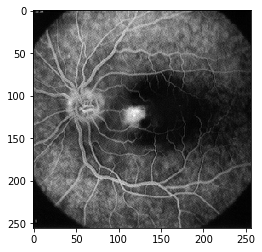

In [2]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline
f = mpimg.imread('../data/retina.tif')  
plt.imshow(f,cmap='gray')

### Exercício 1

Entenda o uso da função numpy.convolve e experimente usá-la para entender o filtro da média. Sugestões:
- comece com uma imagem numérica pequena e depois use a imagem da retina
- faça experimentos variando o tamanho da máscara do filtro e compare as imagens resultantes
- varie também o modos da função, explicando as diferenças encontradas
- compare os resultados obtidos pela função numpy.convolve com a filtragem usando a função conv da toolbox ia898

In [3]:
import sys, os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia
import scipy.signal as sc

/home/furusato/tests/jupyter/jupyter/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/furusato/tests/jupyter/jupyter/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


### Ex04.1 Matrix pequena para testar a convolução:

In [4]:
f_test = np.random.randint(1, 3, (4, 4))
# f_test = np.ones((5,5))
print(f_test)

[[2 1 2 2]
 [2 1 1 1]
 [1 1 1 1]
 [2 1 1 2]]


#### Criando o filtro da média

In [5]:
s = 3
kernel_ex1 = np.ones((s, s))/s**2
print(kernel_ex1)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Pode-se perceber que o modo 'full' mantém a borda utilizada para o tratamento de borda da convolução, enquanto o modo 'same' a elimina após a convolução.  
O modo 'valid' apenas mantém os valores que não foram afetados pela borda.  
Também é possível selecionar se o valor da borda será:
* Replicado: com a opção boundary = 'symm';
* Preenchido com um valor específico: com as opções boundary = 'fill' e fillvalue = valor;
* Circular: com a opção boundary = 'wrap', é o exemplo do 'azulejo'
* Preenchido com zeros: opção padrão

In [6]:
filtered_test1 = sc.convolve2d(f_test, kernel_ex1, mode='full')
filtered_test2 = sc.convolve2d(f_test, kernel_ex1, mode='valid')
filtered_test3 = sc.convolve2d(f_test, kernel_ex1, mode='same', boundary='symm')
filtered_test3a = sc.convolve2d(f_test, kernel_ex1, mode='same')
filtered_test4 = ia.conv(f_test, kernel_ex1)

print('scipy full\n{}\n'.format(filtered_test1))
print('scipy valid\n{}\n'.format(filtered_test2))
print('scipy same symm\n{}\n'.format(filtered_test3))
print('scipy same 0\n{}\n'.format(filtered_test3a))
print('ia.conv\n{}\n'.format(filtered_test4))

scipy full
[[0.22222222 0.33333333 0.55555556 0.55555556 0.44444444 0.22222222]
 [0.44444444 0.66666667 1.         0.88888889 0.66666667 0.33333333]
 [0.55555556 0.88888889 1.33333333 1.22222222 0.88888889 0.44444444]
 [0.55555556 0.88888889 1.22222222 1.11111111 0.77777778 0.44444444]
 [0.33333333 0.55555556 0.77777778 0.77777778 0.55555556 0.33333333]
 [0.22222222 0.33333333 0.44444444 0.44444444 0.33333333 0.22222222]]

scipy valid
[[1.33333333 1.22222222]
 [1.22222222 1.11111111]]

scipy same symm
[[1.66666667 1.55555556 1.44444444 1.66666667]
 [1.44444444 1.33333333 1.22222222 1.33333333]
 [1.44444444 1.22222222 1.11111111 1.22222222]
 [1.44444444 1.22222222 1.22222222 1.44444444]]

scipy same 0
[[0.66666667 1.         0.88888889 0.66666667]
 [0.88888889 1.33333333 1.22222222 0.88888889]
 [0.88888889 1.22222222 1.11111111 0.77777778]
 [0.55555556 0.77777778 0.77777778 0.55555556]]

ia.conv
[[0.22222222 0.33333333 0.55555556 0.55555556 0.44444444 0.22222222]
 [0.44444444 0.66666667

### Ex04.1 Agora com a imagem:

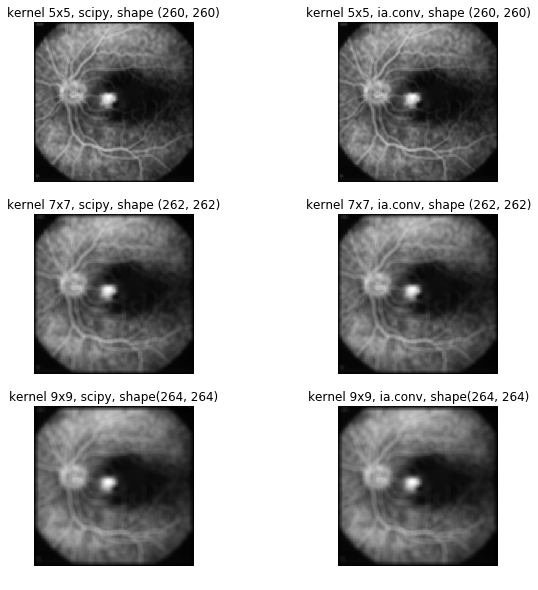

In [7]:
s1 = 5
s2 = 7
s3 = 9
kernel_ex1a = np.ones((s1, s1))/s1**2
kernel_ex1b = np.ones((s2, s2))/s1**2
kernel_ex1c = np.ones((s3, s3))/s1**2

f_filtered_ex1a = sc.convolve2d(f, kernel_ex1a)
f_filtered_ex1b = ia.conv(f, kernel_ex1a)

f_filtered_ex1c = sc.convolve2d(f, kernel_ex1b)
f_filtered_ex1d = ia.conv(f, kernel_ex1b)

f_filtered_ex1e = sc.convolve2d(f, kernel_ex1c)
f_filtered_ex1f = ia.conv(f, kernel_ex1c)

fig_ex1a = plt.figure(figsize=(10,10))

fig_ex1a.add_subplot(321).axis('off')
plt.title('kernel 5x5, scipy, shape {}'.format(f_filtered_ex1a.shape))
plt.imshow(f_filtered_ex1a, cmap='gray')

fig_ex1a.add_subplot(322).axis('off')
plt.title('kernel 5x5, ia.conv, shape {}'.format(f_filtered_ex1b.shape))
plt.imshow(f_filtered_ex1b, cmap='gray')

fig_ex1a.add_subplot(323).axis('off')
plt.title('kernel 7x7, scipy, shape {}'.format(f_filtered_ex1c.shape))
plt.imshow(f_filtered_ex1c, cmap='gray')

fig_ex1a.add_subplot(324).axis('off')
plt.title('kernel 7x7, ia.conv, shape {}'.format(f_filtered_ex1d.shape))
plt.imshow(f_filtered_ex1d, cmap='gray')

fig_ex1a.add_subplot(325).axis('off')
plt.title('kernel 9x9, scipy, shape{}'.format(f_filtered_ex1e.shape))
plt.imshow(f_filtered_ex1e, cmap='gray')

fig_ex1a.add_subplot(326).axis('off')
plt.title('kernel 9x9, ia.conv, shape{}'.format(f_filtered_ex1f.shape))
plt.imshow(f_filtered_ex1f, cmap='gray')

plt.show()

Apenas para comparação, a np.sum da diferença entre cada um (scipy vs ia)

In [8]:
print(np.sum(f_filtered_ex1a-f_filtered_ex1b))
print(np.sum(f_filtered_ex1c-f_filtered_ex1d))
print(np.sum(f_filtered_ex1e-f_filtered_ex1f))

0.0
0.0
0.0


### Ex04.1: Eu já tinha feito com numpy.convolve de uma certa forma. Por isso, vou deixar abaixo.

O numpy.convolve recebe apenas vetores como entrada, e faz a convolução 1D.  
Convoluir e fazer reshape não é uma boa solução, já que a convolução 1D não é a mesma da 2D.  
Para usar na convolução 1D:

In [9]:
s = 5
kernel1 = np.ones((s, s))/s**2
semi_filter = np.ones(s)/s
print(semi_filter)
f_test1 = np.random.randint(1, 3, (7, 7))

[0.2 0.2 0.2 0.2 0.2]


In [10]:
same = f_test1.copy().astype('float32')
full = np.convolve(f_test1.flatten(), kernel1.flatten(), 'full')

for i in range(len(f_test1)):
    same[i] = np.convolve(same[i], semi_filter, mode='same')
for i in range(len(f_test1.T)):
    same.T[i] = np.convolve(same.T[i], semi_filter, mode='same')
    
iaconv = ia.conv(f_test1, kernel1)

print('Full mode. Shape: {}\n{}\n'.format(full.shape, np.around(full, 3)))

print('Same mode. Shape:{}\n {}\n'.format(same.shape, np.around(same.reshape((7,7)), 3)))

print('ia.conv. Shape:{}\n {}\n'.format(iaconv.shape, np.around(iaconv, 3)))

Full mode. Shape: (73,)
[0.04 0.08 0.16 0.2  0.28 0.36 0.4  0.44 0.52 0.6  0.68 0.72 0.8  0.88
 0.96 1.   1.04 1.08 1.16 1.24 1.28 1.36 1.4  1.44 1.52 1.52 1.52 1.52
 1.52 1.52 1.52 1.56 1.6  1.56 1.56 1.56 1.6  1.6  1.6  1.56 1.6  1.6
 1.6  1.56 1.52 1.52 1.52 1.56 1.6  1.52 1.48 1.44 1.36 1.32 1.24 1.16
 1.08 1.   0.96 0.88 0.8  0.72 0.64 0.56 0.52 0.44 0.4  0.36 0.32 0.28
 0.24 0.16 0.08]

Same mode. Shape:(7, 7)
 [[0.52 0.68 0.88 0.96 0.96 0.76 0.6 ]
 [0.68 0.92 1.16 1.2  1.24 1.   0.76]
 [0.88 1.2  1.52 1.56 1.6  1.28 0.96]
 [0.96 1.32 1.6  1.6  1.6  1.28 0.92]
 [0.88 1.2  1.52 1.52 1.56 1.28 0.96]
 [0.72 1.   1.24 1.24 1.28 1.04 0.76]
 [0.56 0.76 0.96 1.   1.   0.8  0.6 ]]

ia.conv. Shape:(11, 11)
 [[0.04 0.08 0.16 0.2  0.28 0.32 0.32 0.24 0.2  0.12 0.04]
 [0.08 0.2  0.36 0.48 0.6  0.68 0.68 0.52 0.4  0.28 0.12]
 [0.16 0.32 0.52 0.68 0.88 0.96 0.96 0.76 0.6  0.4  0.16]
 [0.24 0.44 0.68 0.92 1.16 1.2  1.24 1.   0.76 0.52 0.24]
 [0.28 0.56 0.88 1.2  1.52 1.56 1.6  1.28 0.96 0.64 0.

In [11]:
f.shape

(256, 256)

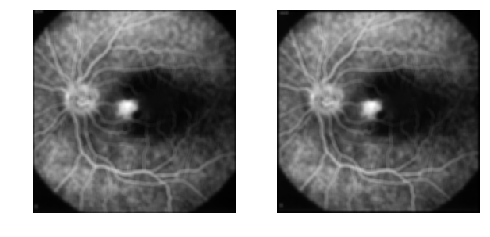

In [12]:
f_filtered = f.copy()

for i in range(len(f)):
    f_filtered[i] = np.convolve(f_filtered[i], semi_filter, mode='same')
for i in range(len(f.T)):
    f_filtered.T[i] = np.convolve(f_filtered.T[i], semi_filter, mode='same')

fig_ex1=plt.figure(figsize=(8,8))

fig_ex1.add_subplot(121).axis('off')
plt.imshow(f_filtered.reshape((256,256)), cmap='gray')

fig_ex1.add_subplot(122).axis('off')
plt.imshow(ia.conv(f, kernel1), cmap = 'gray')
plt.show()

### Exercício 2

Explore o filtro Gaussiano. Sugestões:
- teste a propriedade de decomposição das máscaras da convolução, ou seja, crie um filtro gaussiano bi-dimensional (3,3) a partir de 2 filtros unidimensionais (3,1) e (1,3)
- Faça experimentos de filtragem variando os parâmetros do filtro (tamanho da máscara do filtro, a média e o desvio padrão) 
- adicione ruído a uma imagem e depois tente remover o ruído com filtragem

### Ex04.2 A função abaixo cria um filtro gaussiano (kernel_size, kernel_size)

Sendo que o kernel_size, o sigma e o ponto médio podem variar de acordo com o argumento fornecido à função.  
Eu escolhi uma faixa de -1 a 1, para que o desvio padrão tenha maior influência no filtro.  
$g(x)=\frac{1}{\sigma\sqrt{2\pi}}.e^\left(-\frac{x²}{2\sigma²}\right)$

Obs: Eu não havia me dado conta de que existe um gerador de kernel gaussiano na toolbox, por isso fiz a implementação abaixo, mais simples.

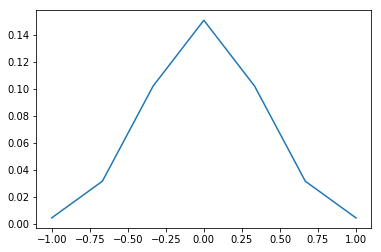

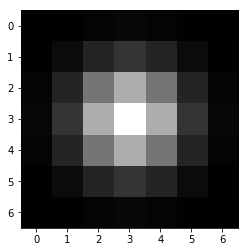

In [13]:
import numpy as np
from math import pi, exp, sqrt

def gauss_kernel(kernel_size=7, sigma=1.0, mean=0):
    
    x = np.linspace(mean-1, mean+1, kernel_size)
    g_x = 1/(sqrt(2*pi)*sigma) * np.exp(-(x**2/2.*(sigma**2)))
    g_y = g_x.reshape(len(g_x),1)
    g_xy = g_x * g_y
    plt.plot(x, g_x)
    plt.show()
    return g_xy

plt.imshow(gauss_kernel(7, 2.65, 0), cmap='gray')
plt.show()

#### Adicionando algum ruído à imagem

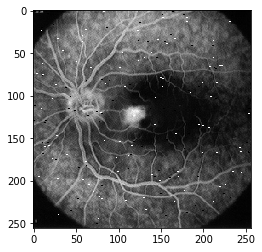

In [14]:
f = ia.normalize(f)

f_noise = f.copy()

for i in range(100):
    random1 = np.random.choice(254)
    random2 = np.random.choice(254)
    f_noise[random1:random1+1, random2:random2+2] = 255
    random1 = np.random.choice(254)
    random2 = np.random.choice(254)
    f_noise[random1:random1+1, random2:random2+2] = 0

# for i in noise:
#     print(f_noise[i])

plt.imshow(f_noise, cmap='gray')

plt.show()

### Sem normalizar

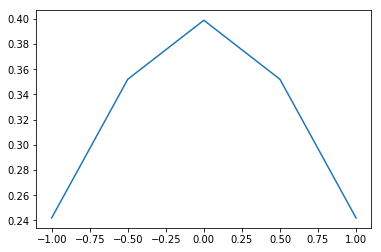

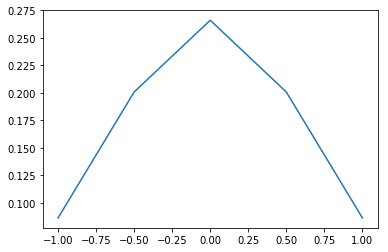

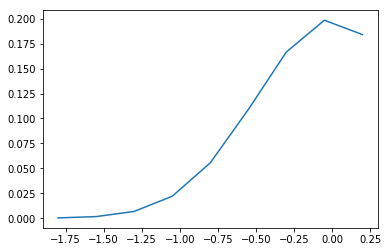

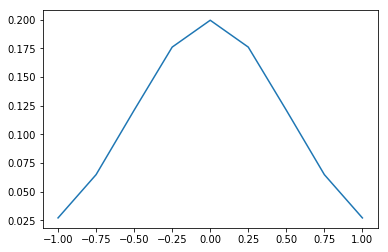

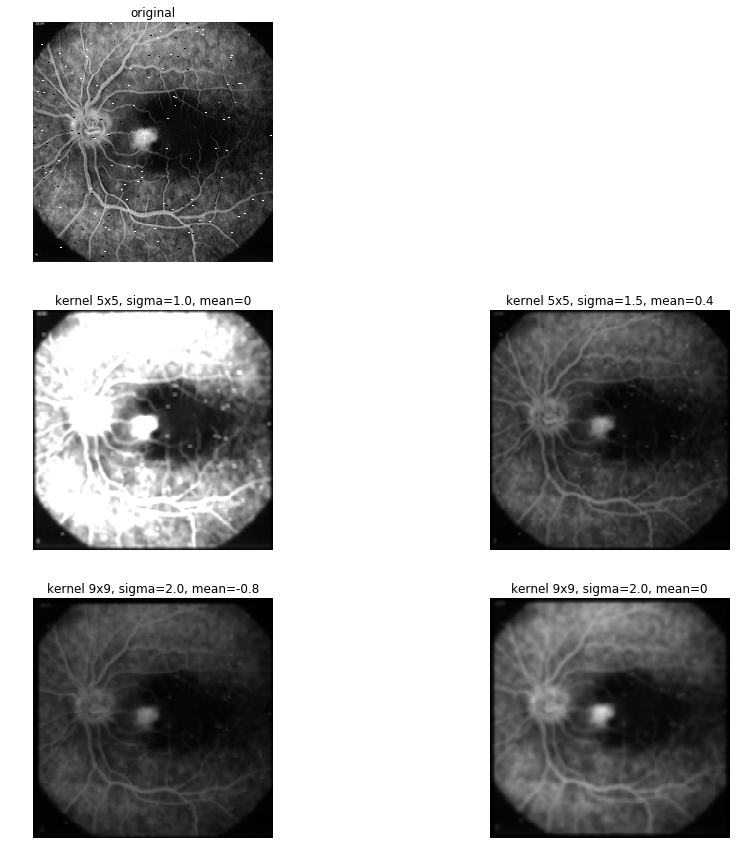

In [15]:
kernel0 = gauss_kernel(5, 1.0, 0)
kernel1 = gauss_kernel(5, 1.5, 0)
kernel2 = gauss_kernel(9, 2.0, -.8)
kernel3 = gauss_kernel(9, 2.0, 0.0)

gauss0 = (ia.conv(f_noise, kernel0))
gauss1 = (ia.conv(f_noise, kernel1))
gauss2 = (ia.conv(f_noise, kernel2))
gauss3 = (ia.conv(f_noise, kernel3))

fig=plt.figure(figsize=(15,15))

plt.subplot(321).axis('off')
plt.title('original')
plt.imshow(f_noise.reshape(256,256), cmap='gray', vmax=255)

plt.subplot(323).axis('off')
plt.imshow(gauss0, cmap='gray', vmax=255)
plt.title('kernel 5x5, sigma=1.0, mean=0')

plt.subplot(324).axis('off')
plt.imshow(gauss1, cmap='gray', vmax=255)
plt.title('kernel 5x5, sigma=1.5, mean=0.4')

plt.subplot(325).axis('off')
plt.title('kernel 9x9, sigma=2.0, mean=-0.8')
plt.imshow(gauss2, cmap='gray', vmax=255)

plt.subplot(326).axis('off')
plt.imshow(gauss3, cmap='gray', vmax=255)
plt.title('kernel 9x9, sigma=2.0, mean=0')

plt.show()

### Normalizado

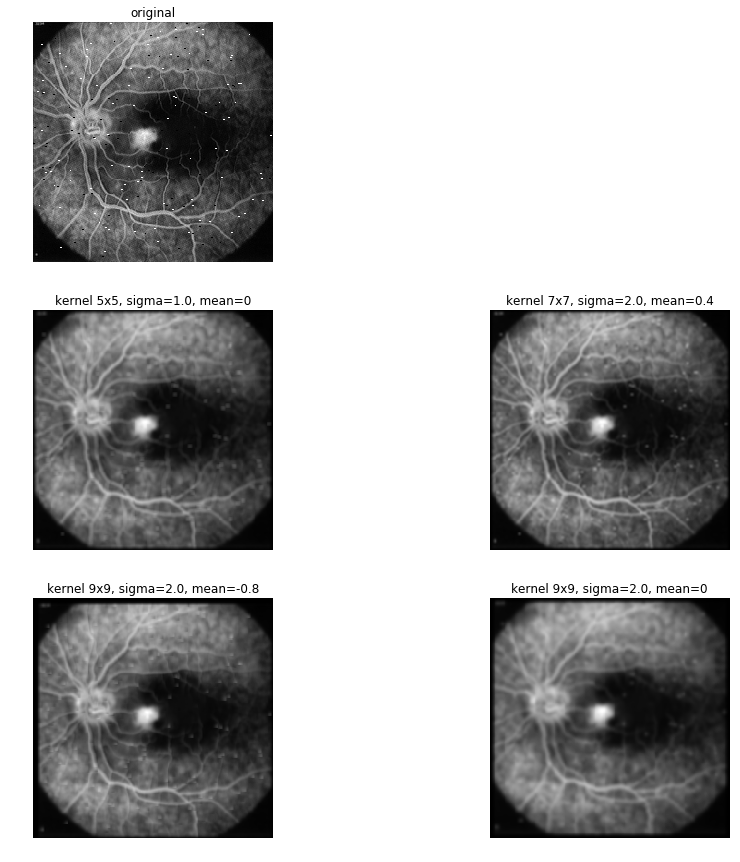

In [16]:
gauss0 = ia.normalize(gauss0)
gauss1 = ia.normalize(gauss1)
gauss2 = ia.normalize(gauss2)
gauss3 = ia.normalize(gauss3)

fig=plt.figure(figsize=(15,15))

plt.subplot(321).axis('off')
plt.title('original')
plt.imshow(f_noise.reshape(256,256), cmap='gray', vmax=255)

plt.subplot(323).axis('off')
plt.imshow(gauss0, cmap='gray', vmax=255)
plt.title('kernel 5x5, sigma=1.0, mean=0')

plt.subplot(324).axis('off')
plt.imshow(gauss1, cmap='gray', vmax=255)
plt.title('kernel 7x7, sigma=2.0, mean=0.4')

plt.subplot(325).axis('off')
plt.title('kernel 9x9, sigma=2.0, mean=-0.8')
plt.imshow(gauss2, cmap='gray', vmax=255)

plt.subplot(326).axis('off')
plt.imshow(gauss3, cmap='gray', vmax=255)
plt.title('kernel 9x9, sigma=2.0, mean=0')

plt.show()

#### Comparação de filtro da média com gaussiano

Não tenho certeza se houve muita diferença no resultado, visualmente.  
Tentei chegar a um resultado sem normalizar, deixando o valor máximo em 255.

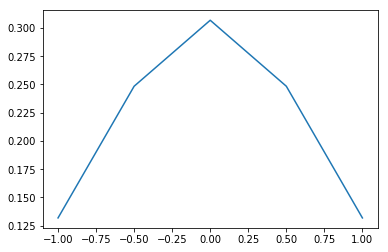

1.7897160018180418


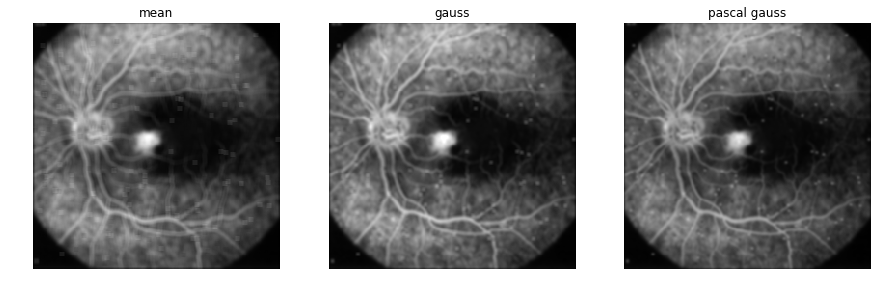

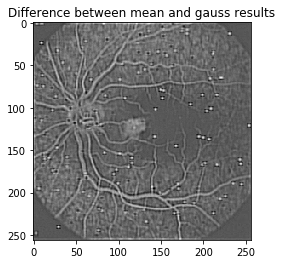

In [17]:
s4 = 5

# Gaussiana pelo triângulo de Pascal
a = np.array([1, 6, 15, 20, 15, 6, 1])
gauss_a = (a/64)*((a/64).reshape((7,1)))

kernel4_gauss = gauss_kernel(s4, 1.3, 0)

kernel4_mean = np.ones((s4, s4))/s4**2

fig2 = plt.figure(figsize=(15,15))


mean = ia.normalize(sc.convolve2d(f_noise, kernel4_mean, mode='same'))

gauss4 = (sc.convolve2d(f_noise, kernel4_gauss, mode='same'))

plt.subplot(131).axis('off')
plt.title('mean')
plt.imshow(mean, cmap='gray', vmax=255)

plt.subplot(132).axis('off')
plt.title('gauss')
plt.imshow(gauss4, cmap='gray', vmax=255)

plt.subplot(133).axis('off')
plt.title('pascal gauss')
plt.imshow((sc.convolve2d(f_noise, gauss_a, mode='same')), cmap='gray', vmax=255)

print(gauss4.min())

plt.show()

plt.imshow(ia.normalize(gauss4 - mean), cmap='gray', vmax=255)
plt.title('Difference between mean and gauss results')
plt.show()

#### Como eu já havia implementado uma gaussiana, apenas utilizo a função da toolbox para entender um pouco.

[0.00455334 0.01152401 0.02528338 0.04808665 0.07928148 0.11331226
 0.14039124 0.15078601 0.14039124 0.11331226 0.07928148 0.04808665
 0.02528338]


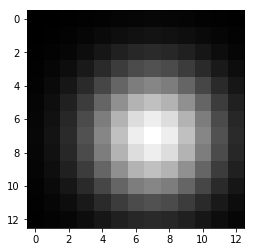

1.5627198070734122e-10


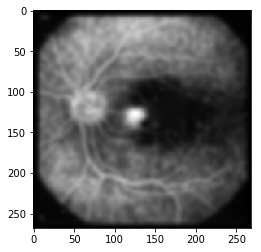

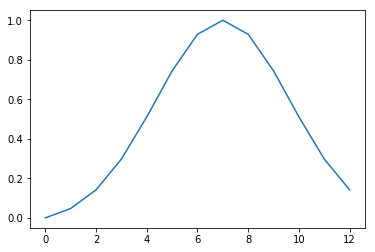

In [21]:
s5 = 13
mean1 = s5//2+1

a1 = ia.gaussian( (s5,), mean1, [[7]]) # média da distribuição normal deslocada
b1 = a1.reshape(s5,1)
print(a1)
ab = a1*b1
plt.imshow(ab, cmap='gray')

plt.show()
c1 = sc.convolve2d(f_noise, ab)
c2 = sc.convolve(f_noise, ab)

print(np.sum(c1-c2))
plt.imshow(c1, cmap='gray')
plt.show()

plt.plot(ia.normalize(a1, [0,1]))
plt.show()